# Exploratory Data Analysis - User Reviews

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='aamnanajmi', api_key='qh51CvyNnvU1t8TfIy93')
import plotly.figure_factory as ff
import math
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Data Loading

In [2]:
import sys
project_path = "/home/aamna/Documents/apc/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)

In [3]:
from src.data.json_loader import JSONLoader

In [4]:
# file_path corresponds to the file of the .gz file which contains the JSON file. 
file_path = '/home/aamna/Documents/apc/reviews_Electronics_5.json.gz'
loader = JSONLoader()

In [5]:
data = loader.load_data(file_path)


In [6]:
data.head()

,asin,reviewerName,reviewTime,reviewText,unixReviewTime,overall,reviewerID,summary,helpful
0,0528881469,amazdnu,"06 2, 2013",We got this GPS for my husband who is an (OTR)...,1370131200,5.0,AO94DHGC771SJ,Gotta have GPS!,"[0, 0]"
1,0528881469,Amazon Customer,"11 25, 2010","I'm a professional OTR truck driver, and I bou...",1290643200,1.0,AMO214LNFCEI4,Very Disappointed,"[12, 15]"
2,0528881469,C. A. Freeman,"09 9, 2010","Well, what can I say. I've had this unit in m...",1283990400,3.0,A3N7T0DY83Y4IG,1st impression,"[43, 45]"
3,0528881469,"Dave M. Shaw ""mack dave""","11 24, 2010","Not going to write a long review, even thought...",1290556800,2.0,A1H8PY3QHMQQA0,"Great grafics, POOR GPS","[9, 10]"
4,0528881469,Wayne Smith,"09 29, 2011",I've had mine for a year and here's what we go...,1317254400,1.0,A24EV6RXELQZ63,"Major issues, only excuses for support","[0, 0]"


In [7]:
data.reviewTime = data.reviewTime .astype(str)
data['Year']=(data['reviewTime'].str[-4:])
data['Month']=(data['reviewTime'].str[0:2])
data['Day']=(data['reviewTime'].str[2:5])
data['Day']=data['Day'].str.replace(',','')
data['helpfulness_ratio']=(data['helpful'].str[0])/(data['helpful'].str[1])
data['review_length']=data['reviewText'].str.len()


In [8]:
def word_count(row):
    str=row['reviewText']
    tokens=str.split()
    n_tokens=len(tokens)
    return n_tokens


In [9]:
data['Wordcount'] = data.apply(lambda row :word_count(row), axis=1)

In [10]:
def f(row):
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] > 3.0:
        val = 'Positive'
    else:
        val = 'Negative'
    return val

In [11]:
data['Reviewcategory'] = data.apply(f, axis=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31dbdd5400>]], dtype=object)

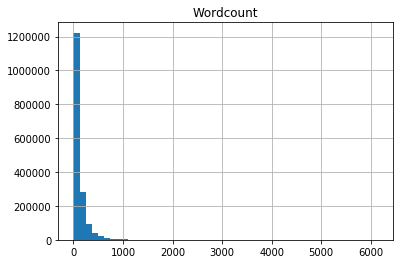

In [60]:
data.hist(column='Wordcount', bins=50)

***Code to extract helpful votes(num) and total votes(den)***

In [12]:

help_df=pd.DataFrame(data['helpful'])
help_df['helpful']=help_df['helpful'].astype(str)
help_df['a'] = help_df['helpful'].apply(lambda x: x.split(',')[0])
help_df['b'] = help_df['helpful'].apply(lambda x: x.split(',')[1])
help_df['num']=help_df['a'].map(lambda x: x.lstrip('['))
help_df['deno']=help_df['b'].map(lambda x: x.rstrip(']'))
help_df['deno']=help_df['deno'].astype(int)
help_df['deno']=help_df['num'].astype(int)
help_df

,helpful,a,b,num,deno
0,"[0, 0]",[0,0],0,0
1,"[12, 15]",[12,15],12,12
2,"[43, 45]",[43,45],43,43
3,"[9, 10]",[9,10],9,9
4,"[0, 0]",[0,0],0,0
5,"[3, 3]",[3,3],3,3
6,"[0, 0]",[0,0],0,0
7,"[0, 0]",[0,0],0,0
8,"[0, 0]",[0,0],0,0
9,"[3, 3]",[3,3],3,3


***calculated mean of total votes(den) and divided each den with this mean to generate weights/scale
Multiplied each helpfulness_ratio in the main dataframe called 'data' with this scale to get helpfulness score*** 

In [13]:
mean=help_df['deno'].mean()
mean
help_df['scale']= help_df['deno']/mean
#help_df['final_ratio']= help_df['helpful_ratio']*help_df['scale']
help_df
#help_df['helpful_ratio']= help_df['num']/help_df['deno']
data['helpfulness_score']=data['helpfulness_ratio']*help_df['scale']

***Since this score has a wide range of values, I have normalized it to get the values bw 0 and 1***

In [16]:

data['helpfulness_score']=(data['helpfulness_score']-data['helpfulness_score'].min())/(data['helpfulness_score'].max()-data['helpfulness_score'].min())

In [21]:
data

,asin,reviewerName,reviewTime,reviewText,unixReviewTime,overall,reviewerID,summary,helpful,Year,Month,Day,helpfulness_ratio,review_length,Wordcount,Reviewcategory,helpfulness_score
0,0528881469,amazdnu,"06 2, 2013",We got this GPS for my husband who is an (OTR)...,1370131200,5.0,AO94DHGC771SJ,Gotta have GPS!,"[0, 0]",2013,06,2,NaN,805,149,Positive,NaN
1,0528881469,Amazon Customer,"11 25, 2010","I'm a professional OTR truck driver, and I bou...",1290643200,1.0,AMO214LNFCEI4,Very Disappointed,"[12, 15]",2010,11,25,0.800000,2175,427,Negative,0.000320
2,0528881469,C. A. Freeman,"09 9, 2010","Well, what can I say. I've had this unit in m...",1283990400,3.0,A3N7T0DY83Y4IG,1st impression,"[43, 45]",2010,09,9,0.955556,4607,846,Neutral,0.001368
3,0528881469,"Dave M. Shaw ""mack dave""","11 24, 2010","Not going to write a long review, even thought...",1290556800,2.0,A1H8PY3QHMQQA0,"Great grafics, POOR GPS","[9, 10]",2010,11,24,0.900000,2246,449,Negative,0.000270
4,0528881469,Wayne Smith,"09 29, 2011",I've had mine for a year and here's what we go...,1317254400,1.0,A24EV6RXELQZ63,"Major issues, only excuses for support","[0, 0]",2011,09,29,NaN,1076,202,Negative,NaN
5,0594451647,"Billy G. Noland ""Bill Noland""","01 3, 2014",I am using this with a Nook HD+. It works as d...,1388707200,5.0,A2JXAZZI9PHK9Z,HDMI Nook adapter cable,"[3, 3]",2014,01,3,1.000000,109,22,Positive,0.000100
6,0594451647,Christian,"04 27, 2014",The cable is very wobbly and sometimes disconn...,1398556800,2.0,A2P5U7BDKKT7FW,Cheap proprietary scam,"[0, 0]",2014,04,27,NaN,128,22,Negative,NaN
7,0594451647,"D. L. Brown ""A Knower Of Good Things""","05 4, 2014",This adaptor is real easy to setup and use rig...,1399161600,5.0,AAZ084UMH8VZ2,A Perfdect Nook HD+ hook up,"[0, 0]",2014,05,4,NaN,580,120,Positive,NaN
8,0594451647,Mark Dietter,"07 11, 2014",This adapter easily connects my Nook HD 7&#34;...,1405036800,4.0,AEZ3CR6BKIROJ,A nice easy to use accessory.,"[0, 0]",2014,07,11,NaN,420,84,Positive,NaN
9,0594451647,Matenai,"01 20, 2014",This product really works great but I found th...,1390176000,5.0,A3BY5KCNQZXV5U,This works great but read the details...,"[3, 3]",2014,01,20,1.000000,978,185,Positive,0.000100


In [22]:
data.dtypes

asin                  object
reviewerName          object
reviewTime            object
reviewText            object
unixReviewTime         int64
overall              float64
reviewerID            object
summary               object
helpful               object
Year                  object
Month                 object
Day                   object
helpfulness_ratio    float64
review_length          int64
Wordcount              int64
Reviewcategory        object
helpfulness_score    float64
dtype: object

In [23]:
dtype=(data.dtypes)
dtype_df=pd.DataFrame({'feature':dtype.index,'type':dtype.values})
dtype_df

,feature,type
0,asin,object
1,reviewerName,object
2,reviewTime,object
3,reviewText,object
4,unixReviewTime,int64
5,overall,float64
6,reviewerID,object
7,summary,object
8,helpful,object
9,Year,object


In [24]:
nans=data.isnull().sum()
total=len(data)
nans=pd.DataFrame({'feature':nans.index,'Number of NaNs':nans.values})
nans


,Number of NaNs,feature
0,0,asin
1,24730,reviewerName
2,0,reviewTime
3,0,reviewText
4,0,unixReviewTime
5,0,overall
6,0,reviewerID
7,0,summary
8,0,helpful
9,0,Year


# Exploration

In [25]:
df = dtype_df.merge(nans, on='feature')
df

table = ff.create_table(df)
py.iplot(table, filename='11111-dashboard')
url1=py.plot(table, filename='11111-dashboard',auto_open=False)
url1

   

'https://plot.ly/~aamnanajmi/69'

In [26]:
data.head()
data_table = ff.create_table(data.head())
py.iplot(data_table, filename='data-dashboard')
url2=py.plot(data_table, filename='data-dashboard',auto_open=False)
url2

'https://plot.ly/~aamnanajmi/9'

In [27]:
data.describe()

,unixReviewTime,overall,helpfulness_ratio,review_length,Wordcount,helpfulness_score
count,1.689188e+06,1.689188e+06,725961.000000,1.689188e+06,1.689188e+06,725961.000000
mean,1.340571e+09,4.222779e+00,0.748940,6.342017e+02,1.162784e+02,0.000222
std,6.342451e+07,1.185632e+00,0.352189,9.030145e+02,1.614467e+02,0.001900
min,9.292320e+08,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.318118e+09,4.000000e+00,0.500000,1.770000e+02,3.300000e+01,0.000033
50%,1.360800e+09,5.000000e+00,1.000000,3.420000e+02,6.400000e+01,0.000033
75%,1.385078e+09,5.000000e+00,1.000000,7.240000e+02,1.340000e+02,0.000107
max,1.406074e+09,5.000000e+00,1.000000,3.270300e+04,6.141000e+03,1.000000


In [28]:
data1=data.drop('unixReviewTime', 1)
print(data1.describe())
data.shape

            overall  helpfulness_ratio  review_length     Wordcount  \
count  1.689188e+06      725961.000000   1.689188e+06  1.689188e+06   
mean   4.222779e+00           0.748940   6.342017e+02  1.162784e+02   
std    1.185632e+00           0.352189   9.030145e+02  1.614467e+02   
min    1.000000e+00           0.000000   0.000000e+00  0.000000e+00   
25%    4.000000e+00           0.500000   1.770000e+02  3.300000e+01   
50%    5.000000e+00           1.000000   3.420000e+02  6.400000e+01   
75%    5.000000e+00           1.000000   7.240000e+02  1.340000e+02   
max    5.000000e+00           1.000000   3.270300e+04  6.141000e+03   

       helpfulness_score  
count      725961.000000  
mean            0.000222  
std             0.001900  
min             0.000000  
25%             0.000033  
50%             0.000033  
75%             0.000107  
max             1.000000  


(1689188, 17)

"\nser1=data.review_length.value_counts()\ndf1=pd.DataFrame({'review_length':ser1.index,'count':ser1.values})\n\nreview_count = [go.Bar(x=df1['Wordcount'],y=df1['count'])]\n#py.iplot(review_count, filename='review_dashboard')\nlayout = go.Layout(\n    title='Count of Ratings according to Wordcount',\n    xaxis=dict(\n        title='Wordcount',\n        titlefont=dict(\n            family='Courier New, monospace',\n            size=18,\n            color='#7f7f7f'\n        )\n    ),\n    yaxis=dict(\n        title='Count',\n        titlefont=dict(\n            family='Courier New, monospace',\n            size=18,\n            color='#7f7f7f'\n        )\n    )\n)\nfig = go.Figure(data=review_count, layout=layout)\nurl40=py.plot(fig, filename='aa',auto_open=False)\nurl40\n"

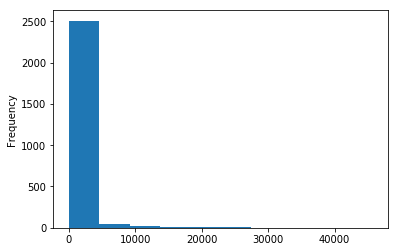

In [33]:
data.Wordcount.value_counts().plot(kind='hist')
'''
ser1=data.review_length.value_counts()
df1=pd.DataFrame({'review_length':ser1.index,'count':ser1.values})

review_count = [go.Bar(x=df1['Wordcount'],y=df1['count'])]
#py.iplot(review_count, filename='review_dashboard')
layout = go.Layout(
    title='Count of Ratings according to Wordcount',
    xaxis=dict(
        title='Wordcount',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=review_count, layout=layout)
url40=py.plot(fig, filename='aa',auto_open=False)
url40
'''

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

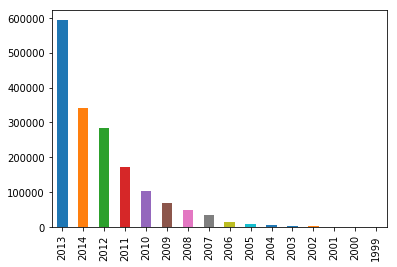

In [30]:
data.Year.value_counts().plot(kind='bar')
ser2= data.Year.value_counts()
df2=pd.DataFrame({'Year':ser2.index,'count':ser2.values})
year_count = [go.Bar(x=df2['Year'],y=df2['count'])]
layout = go.Layout(
    title='Count of Ratings over the years',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Count of Ratings',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=year_count, layout=layout)
url40=py.plot(fig, filename='review0_dashboard',auto_open=False)
url40


In [31]:

df_2014=(data.loc[data['Year'] == '2014'])
print(df_2014.groupby(['Year'])['Month'].max())
df_1999=(data.loc[data['Year'] == '1999'])
print(df_1999.groupby(['Year'])['Month'].min())

Year
2014    07
Name: Month, dtype: object
Year
1999    06
Name: Month, dtype: object


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

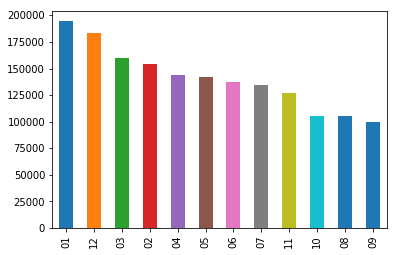

In [32]:
data.Month.value_counts().plot(kind='bar')
ser3= data.Month.value_counts()
df3=pd.DataFrame({'Month':ser3.index,'count':ser3.values})
month_count = [go.Bar(x=df3['Month'],y=df3['count'])]
layout = go.Layout(
    title='Count of Ratings over the months',
    xaxis=dict(
        title='Month',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=month_count, layout=layout)
url40=py.plot(fig, filename='month_dashboard0',auto_open=False)
url40



In [70]:
ser4=data.groupby('Year')['overall'].mean()
df4=pd.DataFrame({'Year':ser4.index,'Mean':ser4.values})
avg = [go.Scatter(x=df4['Year'],y=df4['Mean'])]
layout = go.Layout(
    title='Average ratings over the years',
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Average rating',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=avg, layout=layout)
url40=py.plot(fig, filename='avgß1',auto_open=False)
url40

'https://plot.ly/~aamnanajmi/51'

In [52]:

top=(data.groupby(['reviewerID']).reviewerID.value_counts().nlargest(50))
df5=pd.DataFrame({'reviewerID':top.index,'count':top.values})
df5
rev = [go.Bar(x=df5['reviewerID'],y=df5['count'])]
layout = go.Layout(
    title='Top reviewers according to review count',
    xaxis=dict(
        title='Reviewer ID',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=rev, layout=layout)
url40=py.plot(fig, filename='3',auto_open=False)
url40

'https://plot.ly/~aamnanajmi/73'

In [74]:
df5
words=df5['count'].tolist()
a, b = np.histogram(words, bins=1000)
data = [go.Histogram(x=words,
                    histfunc='count',
                    autobinx=True)]
url_word_freq = py.plot(data, filename='word_freq-dashboard', auto_open=False)
py.iplot(data, filename='basichistogram')


PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [66]:
df5

,count,reviewerID
0,431,"(ADLVFFE4VBT8, ADLVFFE4VBT8)"
1,407,"(A3OXHLG6DIBRW8, A3OXHLG6DIBRW8)"
2,367,"(A6FIAB28IS79, A6FIAB28IS79)"
3,352,"(A680RUE1FDO8B, A680RUE1FDO8B)"
4,351,"(A5JLAU2ARJ0BO, A5JLAU2ARJ0BO)"
5,333,"(A1ODOGXEYECQQ8, A1ODOGXEYECQQ8)"
6,281,"(A36K2N527TXXJN, A36K2N527TXXJN)"
7,267,"(ARBKYIVNYWK3C, ARBKYIVNYWK3C)"
8,261,"(A25C2M3QF9G7OQ, A25C2M3QF9G7OQ)"
9,260,"(AWPODHOB4GFWL, AWPODHOB4GFWL)"


In [86]:

top_year=(data.groupby(['reviewerID','Year']).reviewerID.value_counts().nlargest(200))
df6=pd.DataFrame({'Year':top_year.index,'count':top_year.values})
df6
review_count_year = [go.Bar(x=df6['Year'],y=df6['count'])]
layout = go.Layout(
    title='Top reviewers according to review count in a given year',
    xaxis=dict(
        title='Reviewer ID',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='count',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=review_count_year, layout=layout)
url=py.plot(fig, filename='test',auto_open=False)
url

'https://plot.ly/~aamnanajmi/66'

In [15]:
#helpfulness=data.helpfulness_ratio.value_counts()
#helpfulness
bins=[0,0.2,0.4,0.6,0.8,1.0]
categories=pd.cut(data['helpfulness_ratio'],bins,labels=('0 to 0.2','0.2 to 0.4', None))
df['categories']=pd.cut(data['helpfulness_ratio'],bins,labels=None)
df['Binned']=pd.cut(data['helpfulness_ratio'],bins)
categories

ValueError: Bin labels must be one fewer than the number of bin edges

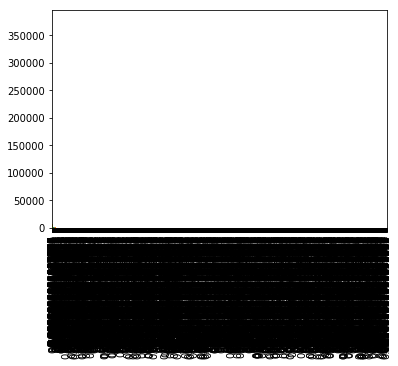

In [85]:
data.helpfulness_ratio.value_counts().plot(kind='bar')

In [171]:

ser5=pd.value_counts(df['categories'])
df7=pd.DataFrame({'range':ser5.index,'count':ser5.values})
helpfulness = [go.Bar(x=df7['range'],y=df7['count'])]
url10=py.plot(helpfulness, filename='helpfulness_dashboard',auto_open=False)
url10


,count,range
0,448163,"(0.8, 1.0]"
1,79054,"(0.6, 0.8]"
2,71851,"(0.4, 0.6]"
3,25250,"(0.2, 0.4]"
4,8836,"(0.0, 0.2]"


In [14]:
bins=[0,100,200,300,400,500,600,700,800,900,1000]
cat=pd.cut(data['Wordcount'],bins,labels=None)
df['cat']=pd.cut(data['Wordcount'],bins,labels=None)
df['bin']=pd.cut(data['Wordcount'],bins)
cat


NameError: name 'df' is not defined

In [172]:
df3=pd.value_counts(df['cat'])
df3
length_table = ff.create_table(df3)
py.iplot(length_table, filename='length_table')
url11=py.plot(length_table, filename='length_tabletable',auto_open=False)
url11

TypeError: object of type 'numpy.int64' has no len()

In [173]:
df3=pd.DataFrame({'range':df3.index,'count':df3.values})
df3

,count,range
0,1072426,"(0, 500]"
1,332541,"(500, 1000]"
2,127866,"(1000, 1500]"
3,61839,"(1500, 2000]"
4,33347,"(2000, 2500]"
5,19710,"(2500, 3000]"
6,12267,"(3000, 3500]"
7,8070,"(3500, 4000]"
8,5313,"(4000, 4500]"
9,3672,"(4500, 5000]"


In [121]:

df_1=(data.loc[data['overall'] == 1.0])
text1=str(df_1['reviewText'])

df_2=(data.loc[data['overall'] == 2.0])
text2=str(df_2['reviewText'])

df_3=(data.loc[data['overall'] == 3.0])
text3=str(df_3['reviewText'])

df_4=(data.loc[data['overall'] == 4.0])
text4=str(df_4['reviewText'])

df_5=(data.loc[data['overall'] == 5.0])
text5=str(df_5['reviewText'])

In [122]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

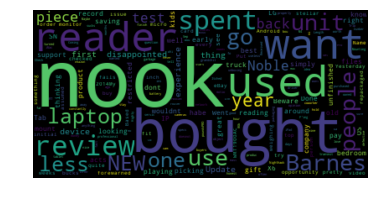

In [123]:
wordcloud = WordCloud().generate(text1)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

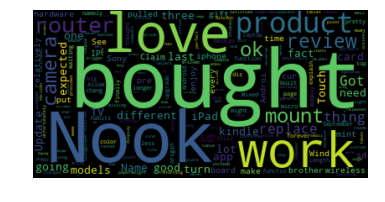

In [111]:
wordcloud = WordCloud().generate(text2)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

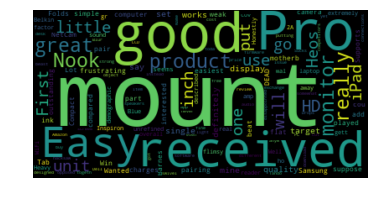

In [112]:
wordcloud = WordCloud().generate(text3)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

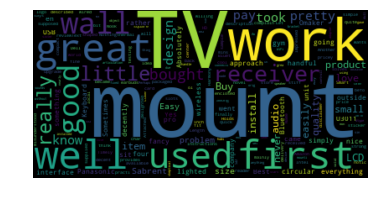

In [113]:
wordcloud = WordCloud().generate(text4)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

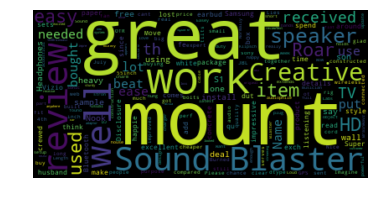

In [114]:
wordcloud = WordCloud().generate(text5)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [79]:

df_1=(data.loc[data['overall'] == 1.0])
text1=str(df_1['summary'])

df_2=(data.loc[data['overall'] == 2.0])
text2=str(df_2['summary'])

df_3=(data.loc[data['overall'] == 3.0])
text3=str(df_3['summary'])

df_4=(data.loc[data['overall'] == 4.0])
text4=str(df_4['summary'])

df_5=(data.loc[data['overall'] == 5.0])
text5=str(df_5['summary'])

(-0.5, 399.5, 199.5, -0.5)

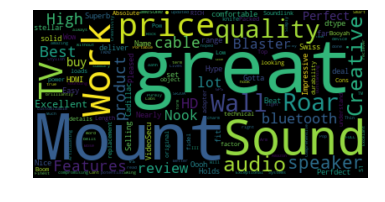

In [83]:
wordcloud = WordCloud().generate(text5)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

***Dataframe with Normalized Helpfulness Score***

In [34]:
data

,asin,reviewerName,reviewTime,reviewText,unixReviewTime,overall,reviewerID,summary,helpful,Year,Month,Day,helpfulness_ratio,review_length,Wordcount,Reviewcategory,helpfulness_score
0,0528881469,amazdnu,"06 2, 2013",We got this GPS for my husband who is an (OTR)...,1370131200,5.0,AO94DHGC771SJ,Gotta have GPS!,"[0, 0]",2013,06,2,NaN,805,149,Positive,NaN
1,0528881469,Amazon Customer,"11 25, 2010","I'm a professional OTR truck driver, and I bou...",1290643200,1.0,AMO214LNFCEI4,Very Disappointed,"[12, 15]",2010,11,25,0.800000,2175,427,Negative,0.000320
2,0528881469,C. A. Freeman,"09 9, 2010","Well, what can I say. I've had this unit in m...",1283990400,3.0,A3N7T0DY83Y4IG,1st impression,"[43, 45]",2010,09,9,0.955556,4607,846,Neutral,0.001368
3,0528881469,"Dave M. Shaw ""mack dave""","11 24, 2010","Not going to write a long review, even thought...",1290556800,2.0,A1H8PY3QHMQQA0,"Great grafics, POOR GPS","[9, 10]",2010,11,24,0.900000,2246,449,Negative,0.000270
4,0528881469,Wayne Smith,"09 29, 2011",I've had mine for a year and here's what we go...,1317254400,1.0,A24EV6RXELQZ63,"Major issues, only excuses for support","[0, 0]",2011,09,29,NaN,1076,202,Negative,NaN
5,0594451647,"Billy G. Noland ""Bill Noland""","01 3, 2014",I am using this with a Nook HD+. It works as d...,1388707200,5.0,A2JXAZZI9PHK9Z,HDMI Nook adapter cable,"[3, 3]",2014,01,3,1.000000,109,22,Positive,0.000100
6,0594451647,Christian,"04 27, 2014",The cable is very wobbly and sometimes disconn...,1398556800,2.0,A2P5U7BDKKT7FW,Cheap proprietary scam,"[0, 0]",2014,04,27,NaN,128,22,Negative,NaN
7,0594451647,"D. L. Brown ""A Knower Of Good Things""","05 4, 2014",This adaptor is real easy to setup and use rig...,1399161600,5.0,AAZ084UMH8VZ2,A Perfdect Nook HD+ hook up,"[0, 0]",2014,05,4,NaN,580,120,Positive,NaN
8,0594451647,Mark Dietter,"07 11, 2014",This adapter easily connects my Nook HD 7&#34;...,1405036800,4.0,AEZ3CR6BKIROJ,A nice easy to use accessory.,"[0, 0]",2014,07,11,NaN,420,84,Positive,NaN
9,0594451647,Matenai,"01 20, 2014",This product really works great but I found th...,1390176000,5.0,A3BY5KCNQZXV5U,This works great but read the details...,"[3, 3]",2014,01,20,1.000000,978,185,Positive,0.000100
